In [9]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd

# Allows the use of display() for DataFrames
from IPython.display import display 

# Import supplementary visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the dataset
in_file = 'titanic_data.csv'
full_data = pd.read_csv(in_file)

# Print the first few entries of the RMS Titanic data
display(full_data.head())

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [10]:
# Store the 'Survived' feature in a new variable and remove it from the dataset
outcomes = full_data['Survived']
data = full_data.drop('Survived', axis = 1)

# Show the new dataset with 'Survived' removed
display(data.head())
display(outcomes.head())

PassengerId  Pclass                                               Name  \
0            1       3                            Braund, Mr. Owen Harris   
1            2       1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
2            3       3                             Heikkinen, Miss. Laina   
3            4       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
4            5       3                           Allen, Mr. William Henry   

      Sex   Age  SibSp  Parch            Ticket     Fare Cabin Embarked  
0    male  22.0      1      0         A/5 21171   7.2500   NaN        S  
1  female  38.0      1      0          PC 17599  71.2833   C85        C  
2  female  26.0      0      0  STON/O2. 3101282   7.9250   NaN        S  
3  female  35.0      1      0            113803  53.1000  C123        S  
4    male  35.0      0      0            373450   8.0500   NaN        S

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [11]:
def accuracy_score(truth, pred):
    """ Returns accuracy score for input truth and predictions. """
    
    # Ensure that the number of predictions matches number of outcomes
    if len(truth) == len(pred): 
        return "Predictions have an accuracy of {:.2f}%".format((truth == pred).mean()*100)
    else:
        return "Number of predictions != match number of outcomes!"
    
# Test the 'accuracy_score' function
predictions = pd.Series(np.ones(100, dtype = int))
print accuracy_score(outcomes[:100], predictions)

Predictions have an accuracy of 41.00%


In [39]:
def predictions_0(data):
    """ Model with no features. Always predicts a passenger did not survive. """
    predictions = []
    for _, passenger in data.iterrows():
        predictions.append(0)
    return pd.Series(predictions)

# Make the predictions
predictions = predictions_0(data)

In [40]:
print accuracy_score(outcomes, predictions)

Predictions have an accuracy of 61.62%


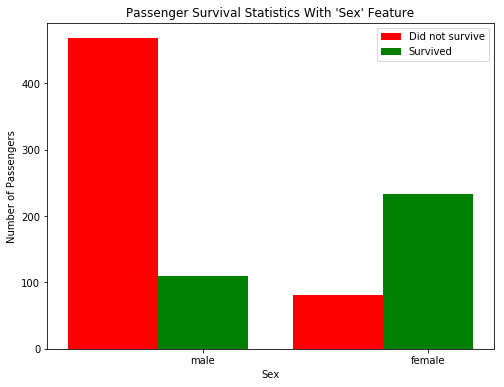

In [24]:
vs.survival_stats(data, outcomes, 'Sex')

In [33]:
def predictions_1(data):
    """ Model with one feature: 
            - Predict a passenger survived if they are female. """
    
    predictions = []
    for _, passenger in data.iterrows():
        
        if passenger['Sex'] == 'female':
            predictions.append(1)
        else:
            predictions.append(0)
        
    return pd.Series(predictions)

predictions = predictions_1(data)

In [34]:
print accuracy_score(outcomes, predictions)

Predictions have an accuracy of 78.68%


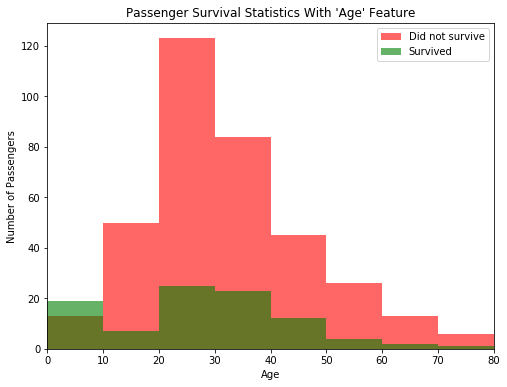

In [36]:
vs.survival_stats(data, outcomes, 'Age', ["Sex == 'male'"])

In [44]:
def predictions_2(data):
    """ Model with two features: 
            - Predict a passenger survived if they are female.
            - Predict a passenger survived if they are male and younger than 10. """
    
    predictions = []
    for _, passenger in data.iterrows():
        
        if passenger['Sex'] == 'female':
            predictions.append(1)
        else:
            if passenger['Age'] < 10:
                predictions.append(1)
            else:
                predictions.append(0)
    return pd.Series(predictions)

predictions = predictions_2(data)

In [42]:
print accuracy_score(outcomes, predictions)

Predictions have an accuracy of 79.35%


Index([u'PassengerId', u'Pclass', u'Name', u'Sex', u'Age', u'SibSp', u'Parch',
       u'Ticket', u'Fare', u'Cabin', u'Embarked'],
      dtype='object')


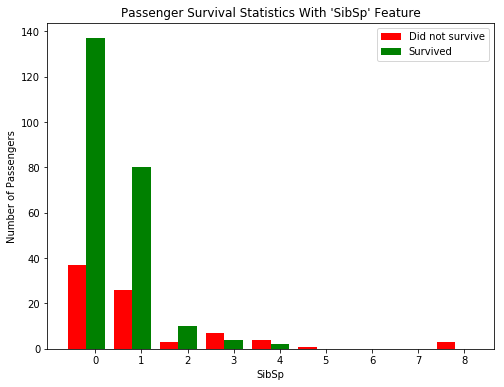

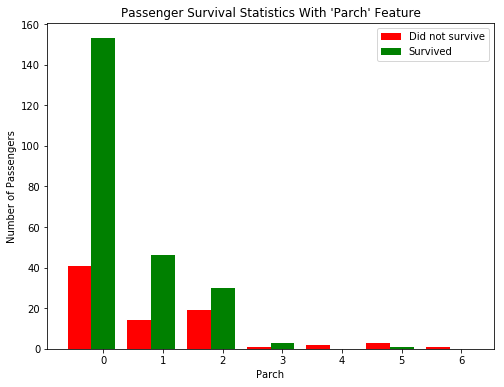

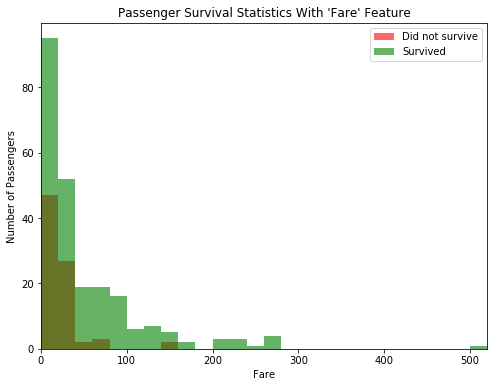

In [115]:
print data.columns
vs.survival_stats(data, outcomes, 'SibSp', ["Sex == 'female'"])
vs.survival_stats(data, outcomes, 'Parch', ["Sex == 'female'"])
vs.survival_stats(data, outcomes, 'Fare', ["Sex == 'female'"])

In [116]:
def predictions_3(data):
    """ Model with multiple features. Makes a prediction with an accuracy of at least 80%. """
    
    predictions = []
    for _, passenger in data.iterrows():
        
        if passenger['Sex'] == 'female':
            if passenger['SibSp'] > 2:
                predictions.append(0)
            else:
                predictions.append(1)
        else:
            if passenger['Age'] <= 12:
                predictions.append(1)
            else:
                predictions.append(0)
    
    return pd.Series(predictions)

predictions = predictions_3(data)

In [117]:
print accuracy_score(outcomes, predictions)

Predictions have an accuracy of 80.25%


*Think of a real-world scenario where supervised learning could be applied. What would be the outcome variable that you are trying to predict? Name two features about the data used in this scenario that might be helpful for making the predictions.* 

### answer
*In supervised learning, we can apply on the prediction of ads campaign bidding perfomrance in different websites.*
*For feature examples, impression time for users and ads exposing frequency to users are crucial to measure the predictions. I believe there are more features can be applied on this case.